<a href="https://colab.research.google.com/github/sripriyaagarwal16/Ardh-Naari-Shakti/blob/main/ardhnaarishakti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

#Reading the data

> Add blockquote



In [3]:
data=pd.read_csv("twitter.csv")

In [4]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
data['label'].unique()

array([0, 1])

In [6]:
data.shape

(31962, 3)

#Plotting the sarcastic and non sarcastic data

sarcastic= 2242
not sarcastic= 29720


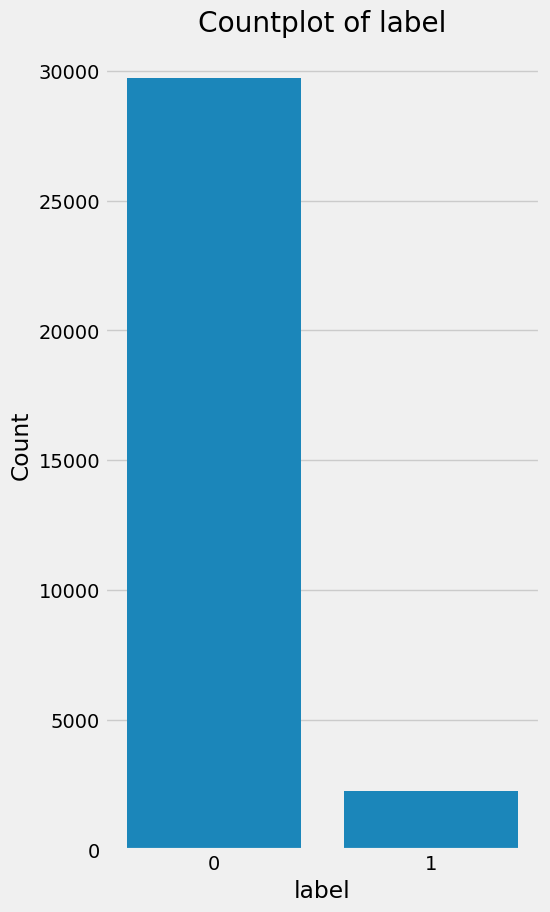

In [14]:
print("sarcastic=",len(data[data['label']==1]))
print("not sarcastic=",len(data[data['label']==0]))
column_name = 'label'
plt.figure(figsize=(5, 10))

sns.countplot(data=data, x=column_name)

plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Countplot of {column_name}')

plt.show()

#Handling Imbalance Data

In [15]:
x=data.drop(["label"], axis=1)
y=data.label

In [16]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

print(f"Before sampling:- {Counter(y)}")
print(f"After sampling:- {Counter(y_ros)}")

Before sampling:- Counter({0: 29720, 1: 2242})
After sampling:- Counter({0: 29720, 1: 29720})


<Axes: title={'center': 'After applying RandomOverSampler'}, xlabel='label'>

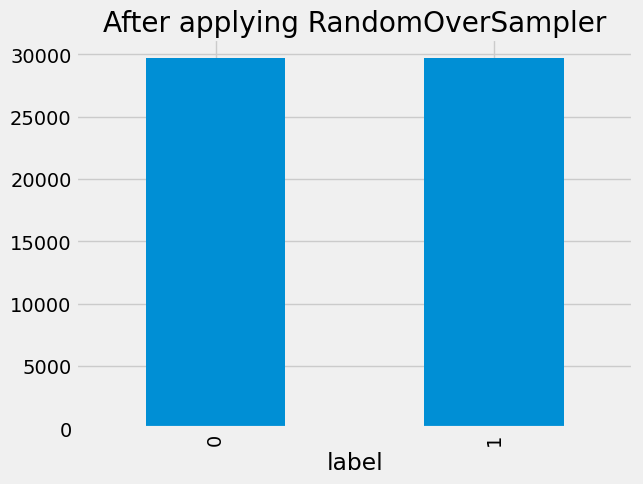

In [17]:
# Visualizing
y_ros.value_counts().plot(kind='bar', title='After applying RandomOverSampler')

#Training using LSTM Model

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense





In [19]:
X = data['tweet']
y = data['label']

max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=100, activation='tanh', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).flatten()



Epoch 1/10
320/320 [==============================] - 66s 199ms/step - loss: 0.1883 - accuracy: 0.9431 - val_loss: 0.1285 - val_accuracy: 0.9544
Epoch 2/10
320/320 [==============================] - 69s 217ms/step - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.1282 - val_accuracy: 0.9568
Epoch 3/10
320/320 [==============================] - 64s 200ms/step - loss: 0.0500 - accuracy: 0.9836 - val_loss: 0.1442 - val_accuracy: 0.9501
Epoch 4/10
320/320 [==============================] - 65s 203ms/step - loss: 0.0372 - accuracy: 0.9867 - val_loss: 0.1714 - val_accuracy: 0.9527
Epoch 5/10
320/320 [==============================] - 64s 200ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.1998 - val_accuracy: 0.9535
Epoch 6/10
320/320 [==============================] - 63s 196ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.2098 - val_accuracy: 0.9497
Epoch 7/10
320/320 [==============================] - 64s 199ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.2283 - val_ac

Accuracy: 0.9541686219302362


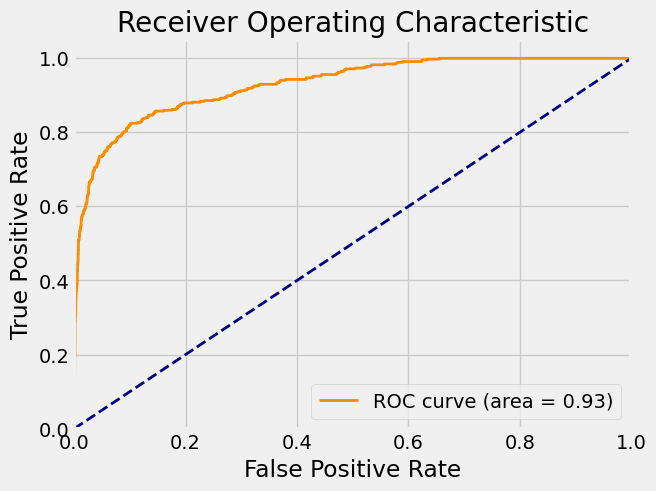

Precision (Sarcastic): 0.7173333333333334
Recall (Sarcastic): 0.5899122807017544
F1 Score (Sarcastic): 0.6474127557160049
ROC AUC: 0.9296570496056547


In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Other performance metrics
precision = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['precision']
recall = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['recall']
f1 = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['f1-score']

print("Precision (Sarcastic):", precision)
print("Recall (Sarcastic):", recall)
print("F1 Score (Sarcastic):", f1)
print("ROC AUC:", roc_auc)

In [29]:
def predict_sarcasm(tweet):
    tweet_seq = tokenizer.texts_to_sequences([tweet])
    if not tweet_seq:
        return "Empty tweet. Cannot predict sarcasm."

    # Use the correct maximum sequence length
    tweet_pad = pad_sequences(tweet_seq, maxlen=max_sequence_length)
    prediction = (model.predict(tweet_pad) > 0.5).astype("int32")
    return 'Comment is Sarcastic' if prediction[0][0] == 1 else 'Comment is Not Sarcastic'

In [30]:
user_input = input("Enter a tweet to predict if it is sarcastic or not: ")
print(f"Prediction: {predict_sarcasm(user_input)}")

Enter a tweet to predict if it is sarcastic or not: stupid
1/1 [==============================] - 0s 70ms/step
Prediction: Comment is Not Sarcastic
